<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/blob/main/Investigacion_Operativa/ORTEGA_YUBRO_PL_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

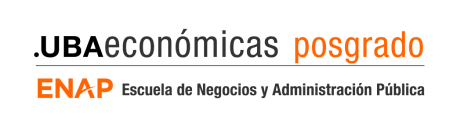

#### Maestría en Métodos Cuantitativos para la Gestión y Análisis de Datos en Organizaciones

#### Técnicas de Investigación Operativa para la Gestión - Programación Lineal

- María José BIANCO
- Verónica María GARCIA FRONTI
- Roberto Darío BACHINI

```
Maestrando: Cristian Darío ORTEGA YUBRO
```


#### Actividad de Evaluación 01 - Programación Lineal

El comité directivo del Banco IO le ha solicitado al gerente financiero recomendaciones de inversión para $ 5 millones y le ha sugerido diversificar la inversión entre los siguientes instrumentos: 
- certificados de depósitos, 
- bonos corporativos, 
- bonos de Tesorería y 
- préstamos para la construcción.



El comité directivo ha dispuesto un límite en la cantidad invertida a cada una de las alternativas y por otro lado se conoce el rendimiento anual para cada inversión. Esta información se presenta en la tabla a continuación:

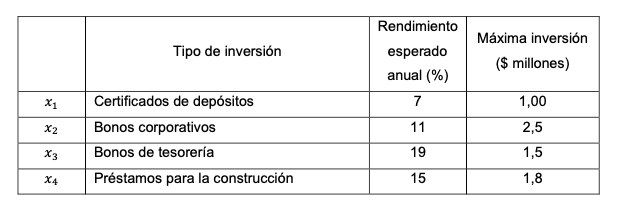

Además, el comité ha indicado que: 
- al menos el 55% de los fondos invertidos sean en bonos de tesorería y préstamos para la construcción y 
- que no menos del 15% sea invertido en certificados de depósitos.

#### Instalando paquetes

In [1]:
install.packages("linprog")
install.packages("lpSolve")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### Habilitando librerias

In [2]:
library(lpSolve)

In [3]:
library(linprog)

#### Semilla

In [4]:
set.seed(2021)

Para asesorar al gerente financiero se solicita:


#####**1) Formular un modelo matemático de Programación Lineal que permita maximizar el rendimiento anual de la inversión.**

In [5]:
c <- c(0.07,0.11,0.19,0.15)

In [6]:
A <- matrix(c(1,1,0,0,0,
              1,0,1,0,0,
              1,0,0,1,0,
              1,0,0,0,1), ncol = 4)

In [7]:
A

1,1,1,1
1,0,0,0
0,1,0,0
0,0,1,0
0,0,0,1


In [8]:
b <- c(5, 1, 2.5, 1.5, 1.8)

In [9]:
dir <- c("=","<=","<=","<=","<=")

In [10]:
RendimientoAnual = solveLP(c,b,A, maximum = TRUE, verbose = 4)

[1] "initial Tableau"
        1     2     3     4 S 1 S 2 S 3 S 4 S 5  P0
1    1.00  1.00  1.00  1.00   1   0   0   0   0 5.0
2    1.00  0.00  0.00  0.00   0   1   0   0   0 1.0
3    0.00  1.00  0.00  0.00   0   0   1   0   0 2.5
4    0.00  0.00  1.00  0.00   0   0   0   1   0 1.5
5    0.00  0.00  0.00  1.00   0   0   0   0   1 1.8
Z-C -0.07 -0.11 -0.19 -0.15   0   0   0   0   0 0.0

Pivot Column: 3 ( 3 )
Pivot Row: 4 ( 4 )

        1     2 3     4 S 1 S 2 S 3   S 4 S 5    P0
1    1.00  1.00 0  1.00   1   0   0 -1.00   0 3.500
2    1.00  0.00 0  0.00   0   1   0  0.00   0 1.000
3    0.00  1.00 0  0.00   0   0   1  0.00   0 2.500
3    0.00  0.00 1  0.00   0   0   0  1.00   0 1.500
5    0.00  0.00 0  1.00   0   0   0  0.00   1 1.800
Z-C -0.07 -0.11 0 -0.15   0   0   0  0.19   0 0.285

Pivot Column: 2 ( 2 )
Pivot Row: 3 ( 3 )

        1 2 3     4 S 1 S 2   S 3   S 4 S 5   P0
1    1.00 0 0  1.00   1   0 -1.00 -1.00   0 1.00
2    1.00 0 0  0.00   0   1  0.00  0.00   0 1.00
2    0.00 1 0  0.

In [11]:
summary(RendimientoAnual)



Results of Linear Programming / Linear Optimization

Objective function (Maximum): 0.742 

Solution
  opt
1 0.0
2 1.7
3 1.5
4 1.8


El rendimiento anual maximo es de \$ 742.000 correspondiente a la inversión de:
- Bonos corporativos \$ 1.700.000
- Bonos de tesoreria \$ 1.500.000
- Prestamos para la construcción \$ 1.800.000

Lo que totaliza una inversión de \$ 5.000.000

#####**2) Resolver el modelo utilizando R e indicar el monto asignado a cada tipo de inversión, el rendimiento anual esperado para esa composición**

In [12]:
c <- c(0.07,0.11,0.19,0.15)

In [13]:
A <- matrix(c(1,1,0,0,0,0,1,
              1,0,1,0,0,0,0,
              1,0,0,1,0,1,0,
              1,0,0,0,1,1,0), ncol = 4)

In [14]:
A

1,1,1,1
1,0,0,0
0,1,0,0
0,0,1,0
0,0,0,1
0,0,1,1
1,0,0,0


In [15]:
b <- c(5, 1, 2.5, 1.5, 1.8, 2.75, 0.75)

In [16]:
dir <- c("=","<=","<=","<=","<=","<=",">=")

In [17]:
RendimientoAnual = solveLP(c,b,A, maximum = TRUE, verbose = 4)

[1] "initial Tableau"
        1     2     3     4 S 1 S 2 S 3 S 4 S 5 S 6 S 7   P0
1    1.00  1.00  1.00  1.00   1   0   0   0   0   0   0 5.00
2    1.00  0.00  0.00  0.00   0   1   0   0   0   0   0 1.00
3    0.00  1.00  0.00  0.00   0   0   1   0   0   0   0 2.50
4    0.00  0.00  1.00  0.00   0   0   0   1   0   0   0 1.50
5    0.00  0.00  0.00  1.00   0   0   0   0   1   0   0 1.80
6    0.00  0.00  1.00  1.00   0   0   0   0   0   1   0 2.75
7    1.00  0.00  0.00  0.00   0   0   0   0   0   0   1 0.75
Z-C -0.07 -0.11 -0.19 -0.15   0   0   0   0   0   0   0 0.00

Pivot Column: 3 ( 3 )
Pivot Row: 4 ( 4 )

        1     2 3     4 S 1 S 2 S 3   S 4 S 5 S 6 S 7    P0
1    1.00  1.00 0  1.00   1   0   0 -1.00   0   0   0 3.500
2    1.00  0.00 0  0.00   0   1   0  0.00   0   0   0 1.000
3    0.00  1.00 0  0.00   0   0   1  0.00   0   0   0 2.500
3    0.00  0.00 1  0.00   0   0   0  1.00   0   0   0 1.500
5    0.00  0.00 0  1.00   0   0   0  0.00   1   0   0 1.800
6    0.00  0.00 0  1.00   

In [18]:
summary(RendimientoAnual)



Results of Linear Programming / Linear Optimization

Objective function (Maximum): 0.72 

Solution
   opt
1 0.00
2 2.25
3 1.50
4 1.25


El rendimiento anual maximo es de \$ 720.000 correspondiente a la inversión de:
- Bonos corporativos \$ 2.250.000
- Bonos de tesoreria \$ 1.500.000
- Prestamos para la construcción \$ 1.250.000

Lo que totaliza una inversión de \$ 5.000.000

Bonos de tesoreria y Prestamos para la construcción representan el 55% de la inversión

#####**3) Sin resolver nuevamente el problema, si es posible ¿Cuál sería la composición óptima de la inversión y el rendimiento total esperado en un escenario en que el rendimiento de los Certificados de depósito aumente a 10%? Justificar claramente la respuesta.**

Los certificados de depósitos no maximizan el rendimiento anual de la inversión, por lo tanto el incremento en el rendimiento del certificado de depósito no modifica la composición óptima...

El rendimiento anual maximo es el mismo de \$ 720.000 correspondiente a la inversión de:
- Bonos corporativos \$ 2.250.000
- Bonos de tesoreria \$ 1.500.000
- Prestamos para la construcción \$ 1.250.000

Lo que totaliza una inversión de \$ 5.000.000

Bonos de tesoreria y Prestamos para la construcción representan el 55% de la inversión

Comprobación:

In [27]:
c <- c(0.10,0.11,0.19,0.15)

In [28]:
A <- matrix(c(1,1,0,0,0,0,1,
              1,0,1,0,0,0,0,
              1,0,0,1,0,1,0,
              1,0,0,0,1,1,0), ncol = 4)

In [29]:
A

1,1,1,1
1,0,0,0
0,1,0,0
0,0,1,0
0,0,0,1
0,0,1,1
1,0,0,0


In [30]:
b <- c(5, 1, 2.5, 1.5, 1.8, 2.75, 0.75)

In [31]:
dir <- c("=","<=","<=","<=","<=","<=",">=")

In [32]:
RendimientoAnual = solveLP(c,b,A, maximum = TRUE, verbose = 4)

[1] "initial Tableau"
       1     2     3     4 S 1 S 2 S 3 S 4 S 5 S 6 S 7   P0
1    1.0  1.00  1.00  1.00   1   0   0   0   0   0   0 5.00
2    1.0  0.00  0.00  0.00   0   1   0   0   0   0   0 1.00
3    0.0  1.00  0.00  0.00   0   0   1   0   0   0   0 2.50
4    0.0  0.00  1.00  0.00   0   0   0   1   0   0   0 1.50
5    0.0  0.00  0.00  1.00   0   0   0   0   1   0   0 1.80
6    0.0  0.00  1.00  1.00   0   0   0   0   0   1   0 2.75
7    1.0  0.00  0.00  0.00   0   0   0   0   0   0   1 0.75
Z-C -0.1 -0.11 -0.19 -0.15   0   0   0   0   0   0   0 0.00

Pivot Column: 3 ( 3 )
Pivot Row: 4 ( 4 )

       1     2 3     4 S 1 S 2 S 3   S 4 S 5 S 6 S 7    P0
1    1.0  1.00 0  1.00   1   0   0 -1.00   0   0   0 3.500
2    1.0  0.00 0  0.00   0   1   0  0.00   0   0   0 1.000
3    0.0  1.00 0  0.00   0   0   1  0.00   0   0   0 2.500
3    0.0  0.00 1  0.00   0   0   0  1.00   0   0   0 1.500
5    0.0  0.00 0  1.00   0   0   0  0.00   1   0   0 1.800
6    0.0  0.00 0  1.00   0   0   0 -1.00 

In [33]:
summary(RendimientoAnual)



Results of Linear Programming / Linear Optimization

Objective function (Maximum): 0.72 

Solution
   opt
1 0.00
2 2.25
3 1.50
4 1.25


#####**4) Sin resolver nuevamente el problema, si es posible. Analizar, si es conveniente destinar $900.000 más para invertir en esta cartera suponiendo que para hacerlo haya que retirar esa suma de otras inversiones donde tenían un rendimiento de 10%. Justificar claramente la respuesta.**

Si es conveniente ya que hay que retirar inversiones de rendimiento del 10%, esto sería los certificados de depósitos y su retiro de la cartera de inversión no afecta el rendimiento anual de las inversiones en los otros activos financieros...